In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame,date_range
from matplotlib import cm
import seaborn as sns
import scipy as sp
import math
import warnings
warnings.filterwarnings('ignore')

In [29]:
# process data
dat=pd.read_csv("data/MG/spacer_abun_sample.csv")
dat.head()

,Unnamed: 0,sum,max,am0001,am0002,am0003,am0004,am0005,am0006,am0007,...,am0222,am0223,am0224,am0225,am0226,am0227,am0228,am0229,am0230,am0231
0,DR1_SP0_cov55_1536,54.0,5,1,3,0,2,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,DR1_SP1_cov64_1646,66.5,6,2,3,0,4,0,0,2,...,0,1,0,0,0,0,0,0,0,0
2,DR1_SP10_cov99_3140,103.0,8,1,5,0,1,0,3,0,...,0,1,0,0,0,0,0,1,0,0
3,DR1_SP11_cov86_3348,95.5,12,2,2,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,DR1_SP12_cov39_3541,62.0,6,1,3,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
dat.columns

Index(['Unnamed: 0', 'sum', 'max', 'am0001', 'am0002', 'am0003', 'am0004',
       'am0005', 'am0006', 'am0007',
       ...
       'am0222', 'am0223', 'am0224', 'am0225', 'am0226', 'am0227', 'am0228',
       'am0229', 'am0230', 'am0231'],
      dtype='object', length=209)

In [31]:
allsamples = dat.shape[1]
allspacers = dat.shape[0]
dat.columns[3:allsamples]

Index(['am0001', 'am0002', 'am0003', 'am0004', 'am0005', 'am0006', 'am0007',
       'am0008', 'am0009', 'am0010',
       ...
       'am0222', 'am0223', 'am0224', 'am0225', 'am0226', 'am0227', 'am0228',
       'am0229', 'am0230', 'am0231'],
      dtype='object', length=206)

In [32]:
# compute prevalence
dat['prevalence']=0
for i in range(0,allspacers):
    presence_set = [k for k in range(3,allsamples) if dat.iloc[i,k] > 0]
    dat.loc[i,'prevalence']=len(presence_set)
dat.to_csv('data/MG/spacer_abun_sample_sumdraft.txt', sep='\t')

In [33]:
### No.SNPs versus coverage
dat=pd.read_csv("data/MG/spacer_abun_sample_sumdraft.txt",sep='\t',index_col=0)
dat['mean']=np.log10(dat['sum']/allsamples)
dat.head()

,Unnamed: 0.1,sum,max,am0001,am0002,am0003,am0004,am0005,am0006,am0007,...,am0224,am0225,am0226,am0227,am0228,am0229,am0230,am0231,prevalence,mean
0,DR1_SP0_cov55_1536,54.0,5,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,68,-0.587753
1,DR1_SP1_cov64_1646,66.5,6,2,3,0,4,0,0,2,...,0,0,0,0,0,0,0,0,71,-0.497325
2,DR1_SP10_cov99_3140,103.0,8,1,5,0,1,0,3,0,...,0,0,0,0,0,1,0,0,88,-0.307309
3,DR1_SP11_cov86_3348,95.5,12,2,2,0,2,0,2,0,...,0,0,0,0,0,0,0,0,81,-0.340143
4,DR1_SP12_cov39_3541,62.0,6,1,3,1,2,0,0,0,...,0,0,0,0,0,0,0,0,68,-0.527755


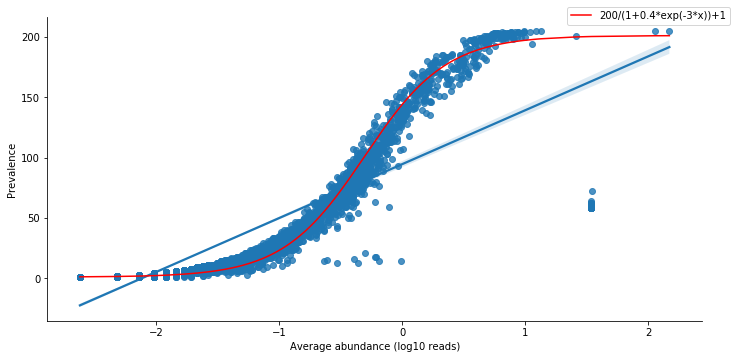

In [102]:
# No.SNPs versus coverage, logistic regression
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
def logifunc(x,L,c,k,off):
    return L/ (1 + c*np.exp(-k*x))+off

x = dat['mean']
y = dat['prevalence']

popt, pcov = curve_fit(logifunc, x, y, p0=[200,0.3,3,1])
x = x.sort_values()

sns.lmplot(x='mean', y='prevalence', data=dat, palette='RuGy_r',
           height=5, aspect=2)#col="Color",
plt.xlabel('Average abundance (log10 reads)')  
plt.ylabel('Prevalence') 
plt.plot(x, logifunc(x,200,0.4,3,1), 'r-',label="%s/(1+%s*exp(-%s*x))+%s"%(200,0.4,3,1))
#plt.plot(x, logifunc(x, *popt), 'r-',label='Fitted function')
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.savefig('data/MG/MG_prevalence.pdf')

In [ ]:
# filter by prevalence >= 3
dat=pd.read_csv("data/MG/spacer_abun_sample_sumdraft.txt",sep='\t',index_col=0)
dat = dat[dat['prevalence']>=3]
dat.shape

In [ ]:
# compute unique DR
allspacers = dat.shape[0]
dat['DR']=''
for i in range(0,allspacers):
    dat.iloc[i,allsamples+1] = np.char.split(dat.iloc[i,0],'_',maxsplit=1).item(0)[0]
    dat.iloc[i,0] = np.char.split(dat.iloc[i,0],'_',maxsplit=2).item(0)[1]

In [ ]:
dat.to_csv('data/MG/spacer_abun_sample_sum.txt', sep='\t')
dat.tail()

In [76]:
### normalize to equal depth
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame,date_range
from matplotlib import cm
import seaborn as sns
import scipy as sp
import math
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.multitest import fdrcorrection
## load processed data
dat=pd.read_csv("data/MG/spacer_abun_sample_sum.txt",sep='\t',index_col=0)
DR_all = dat.DR.unique()
dat = pd.DataFrame(dat).set_index('Unnamed: 0.1')
dat.head()

,sum,max,am0001,am0002,am0003,am0004,am0005,am0006,am0007,am0008,...,am0224,am0225,am0226,am0227,am0228,am0229,am0230,am0231,prevalence,DR
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,,,
SP0,54.0,5,1,3,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,68,DR1
SP1,66.5,6,2,3,0,4,0,0,2,1,...,0,0,0,0,0,0,0,0,71,DR1
SP10,103.0,8,1,5,0,1,0,3,0,3,...,0,0,0,0,0,1,0,0,88,DR1
SP11,95.5,12,2,2,0,2,0,2,0,2,...,0,0,0,0,0,0,0,0,81,DR1
SP12,62.0,6,1,3,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,68,DR1


In [77]:
dat.iloc[:,2:-2].sum(axis=1)

Unnamed: 0.1
SP0     108
SP1     133
SP10    206
SP11    191
SP12    124
       ... 
SP37      4
SP4       9
SP5       7
SP7       4
SP9      10
Length: 3942, dtype: int64

In [84]:
# normalize to equal depth
dat_samplesum = dat.iloc[:,2:-2].sum()
dat_samplesum=pd.DataFrame(dat_samplesum,columns = ['sum'])
#dat_samplesum=dat_samplesum[dat_samplesum['sum']<20000]
dat_samplesum.head(10)

,sum
am0001,1641.0
am0002,2223.0
am0003,133.0
am0004,2178.0
am0005,1595.0
am0006,2591.0
am0007,32525.0
am0008,7245.0
am0009,8804.0
am0010,9000.0


In [86]:
np.quantile(dat_samplesum,[0.1,0.25,0.5,0.75,0.9])

array([ 921.  , 1640.25, 2426.  , 3617.  , 5676.5 ])

In [87]:
dat2=dat.loc[:,['DR','am0001']]
depth_sample = 2500#median
totaldepth = dat_samplesum.iloc[0,0]
depth_wanted = 1
for i in range(1,dat_samplesum.shape[0]):
    newdepth = dat_samplesum.iloc[i,0]
    if totaldepth<depth_sample:
        # add next sample
        if totaldepth+newdepth<=depth_sample:
            # add whole sample
            totaldepth+=newdepth
            dat2.iloc[:,-1]+=dat.iloc[:,i+2]
        else:
            # add partial sample
            depth_wanted = (depth_sample-totaldepth)/newdepth
            dat2.iloc[:,-1]+=dat.iloc[:,i+2]*depth_wanted
            dat.iloc[:,i+2]=dat.iloc[:,i+2]*(1-depth_wanted)
            dat_samplesum.iloc[i,0] = dat_samplesum.iloc[i,0]*(1-depth_wanted)
            # next sample
            totaldepth = dat_samplesum.iloc[i,0]
            dat2[dat.columns[i+2]] = dat.iloc[:,i+2]
    else:
        # next sample
        totaldepth = dat_samplesum.iloc[i,0]
        dat2[dat.columns[i+2]] = dat.iloc[:,i+2]
    print(dat2.columns[-1],totaldepth,dat.columns[i+2],depth_wanted)
dat2.head()

am0002 1364.0 am0002 0.38641475483580745
am0002 1497.0 am0003 0.38641475483580745
am0004 1175.0 am0004 0.460514233241506
am0005 270.0 am0005 0.8307210031347962
am0006 361.00000000000034 am0006 0.8606715553840215
am0007 30386.000000000004 am0007 0.06576479631053034
am0008 7245.0 am0008 0.06576479631053034
am0009 8804.0 am0009 0.06576479631053034
am0010 9000.0 am0010 0.06576479631053034
am0011 3933.0 am0011 0.06576479631053034
am0012 1568.0 am0012 0.06576479631053034
am0013 680.0 am0013 0.5781637717121588
am0014 1026.9999999999995 am0014 0.6392694063926941
am0015 646.9999999999995 am0015 0.6948113207547172
am0016 2587.999999999999 am0016 0.4172483674848008
am0017 1309.0 am0017 0.4172483674848008
am0017 2164.0 am0018 0.4172483674848008
am0019 87.99999999999999 am0019 0.7924528301886793
am0020 544.9999999999999 am0020 0.815691579303348
am0021 1105.0000000000002 am0021 0.6388888888888888
am0022 3025.0 am0022 0.3156108597285067
am0023 2035.0 am0023 0.3156108597285067
am0024 883.0000000000001

am0228 48.00000000000021 am0228 0.962174940898345
am0229 451.00000000000006 am0229 0.8446434722700654
am0230 1908.0000000000002 am0230 0.5178165276724791
am0231 2393.0000000000005 am0231 0.198324958123953


,DR,am0001,am0002,am0004,am0005,am0006,am0007,am0008,am0009,am0010,...,am0221,am0222,am0223,am0224,am0225,am0227,am0228,am0229,am0230,am0231
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,,,
SP0,DR1,2.159244,2.761784,1.078972,0.000000,0.000000,0.000000,2,0,0,...,0.711798,1.303111,0.403852,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
SP1,DR1,3.159244,3.682813,2.157943,0.000000,0.122459,1.739623,1,0,0,...,0.000000,0.303111,0.403852,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
SP10,DR1,2.932074,3.528440,0.539486,1.815468,0.293894,0.000000,3,0,0,...,0.000000,0.303111,0.403852,0.0,0.0,0.0,0.844643,0.155357,0.0,0.0
SP11,DR1,2.772830,2.148199,1.078972,1.210312,0.195929,0.000000,2,0,0,...,1.423596,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
SP12,DR1,2.159244,2.866591,1.078972,0.000000,0.000000,0.000000,1,0,0,...,1.423596,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [88]:
dat2.head()

,DR,am0001,am0002,am0004,am0005,am0006,am0007,am0008,am0009,am0010,...,am0221,am0222,am0223,am0224,am0225,am0227,am0228,am0229,am0230,am0231
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,,,
SP0,DR1,2.159244,2.761784,1.078972,0.000000,0.000000,0.000000,2,0,0,...,0.711798,1.303111,0.403852,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
SP1,DR1,3.159244,3.682813,2.157943,0.000000,0.122459,1.739623,1,0,0,...,0.000000,0.303111,0.403852,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
SP10,DR1,2.932074,3.528440,0.539486,1.815468,0.293894,0.000000,3,0,0,...,0.000000,0.303111,0.403852,0.0,0.0,0.0,0.844643,0.155357,0.0,0.0
SP11,DR1,2.772830,2.148199,1.078972,1.210312,0.195929,0.000000,2,0,0,...,1.423596,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
SP12,DR1,2.159244,2.866591,1.078972,0.000000,0.000000,0.000000,1,0,0,...,1.423596,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [89]:
sum(dat2.iloc[:,1:].sum())

1219096.0

In [90]:
dat_samplesum.sum()

sum    1094603.0
dtype: float64

In [91]:
# subsample big samples
dat_samplesum = dat2.iloc[:,1:].sum()
dat_samplesum=pd.DataFrame(dat_samplesum,columns = ['sum'])
dat_samplesum.head(10)

,sum
am0001,2500.0
am0002,2500.0
am0004,2500.0
am0005,2500.0
am0006,2500.0
am0007,30386.0
am0008,7245.0
am0009,8804.0
am0010,9000.0
am0011,3933.0


In [92]:
for i in range(0,dat_samplesum.shape[0]):
    newdepth = dat_samplesum.iloc[i,0]
    if newdepth > depth_sample*1.1:
        # subsample
        depth_wanted = depth_sample/newdepth
        dat2.iloc[:,i+1]=dat2.iloc[:,i+1]*depth_wanted
dat_samplesum = dat2.iloc[:,1:].sum()
dat_samplesum=pd.DataFrame(dat_samplesum,columns = ['sum'])
dat_samplesum.head(10)

,sum
am0001,2500.0
am0002,2500.0
am0004,2500.0
am0005,2500.0
am0006,2500.0
am0007,2500.0
am0008,2500.0
am0009,2500.0
am0010,2500.0
am0011,2500.0


In [93]:
sum(dat2.iloc[:,1:].sum())

450427.0000000002

In [94]:
dat2.to_csv('data/MG/spacer_abun_sample_sum.normdepth.txt', sep='\t')

In [120]:
## find acquired spacers spearman test
# use original data
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame,date_range
from matplotlib import cm
import seaborn as sns
import scipy as sp
import math
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.multitest import fdrcorrection
## load original data
dat=pd.read_csv('data/MG/spacer_abun_sample.csv',sep=',',index_col=0)
# load DR data
DRabu=pd.read_csv('data/MG/dr_abun_sample.csv',sep=',',index_col=0)
dat=dat.iloc[:,2:]
dat['DR']=[x.split('_')[0] for x in dat.index]
dat.index = [x.split('_')[1] for x in dat.index]
dat = dat.iloc[:,[-1] + list(range(0,dat.shape[1]-1))]
DR_all = dat['DR'].unique()
dat.head()

,DR,am0001,am0002,am0003,am0004,am0005,am0006,am0007,am0008,am0009,...,am0222,am0223,am0224,am0225,am0226,am0227,am0228,am0229,am0230,am0231
SP0,DR1,1,3,0,2,0,0,0,2,0,...,1,1,0,0,0,0,0,0,0,0
SP1,DR1,2,3,0,4,0,0,2,1,0,...,0,1,0,0,0,0,0,0,0,0
SP10,DR1,1,5,0,1,0,3,0,3,0,...,0,1,0,0,0,0,0,1,0,0
SP11,DR1,2,2,0,2,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
SP12,DR1,1,3,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import scipy.stats as stats
print(stats.ks_2samp([5]*100,[10]*100,alternative = 'less'))
print(stats.ks_2samp([10]*100,[5]*100,alternative = 'less'))

KstestResult(statistic=0.0, pvalue=1.0)
KstestResult(statistic=1.0, pvalue=1.104380346599751e-59)


2022-05-07 11:17:54.873560 processed 10 of 291 DRs
2022-05-07 11:18:13.417576 processed 20 of 291 DRs
2022-05-07 11:18:17.523406 processed 30 of 291 DRs
2022-05-07 11:18:27.688583 processed 40 of 291 DRs
2022-05-07 11:18:28.920310 processed 50 of 291 DRs
2022-05-07 11:18:52.263915 processed 60 of 291 DRs
2022-05-07 11:18:55.180651 processed 70 of 291 DRs
2022-05-07 11:18:56.990306 processed 80 of 291 DRs
2022-05-07 11:19:11.339075 processed 90 of 291 DRs
2022-05-07 11:19:11.929738 processed 100 of 291 DRs
2022-05-07 11:19:17.324846 processed 110 of 291 DRs
2022-05-07 11:19:34.135883 processed 120 of 291 DRs
2022-05-07 11:19:38.480812 processed 130 of 291 DRs
2022-05-07 11:19:39.728444 processed 140 of 291 DRs
2022-05-07 11:20:19.712513 processed 150 of 291 DRs
2022-05-07 11:20:58.444615 processed 160 of 291 DRs
2022-05-07 11:22:04.011392 processed 170 of 291 DRs
2022-05-07 11:22:13.174063 processed 180 of 291 DRs
2022-05-07 11:22:17.113640 processed 190 of 291 DRs
2022-05-07 11:22:19.4

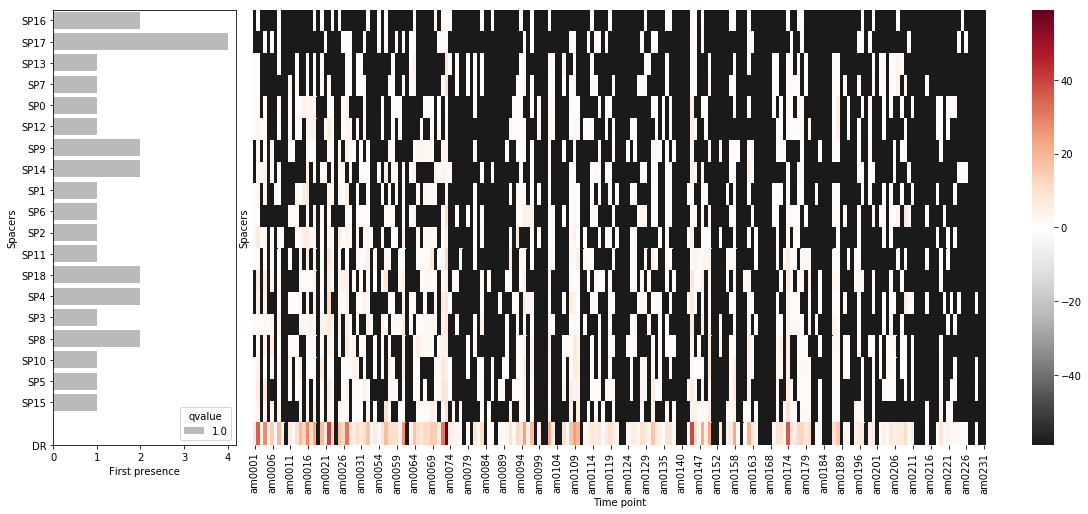

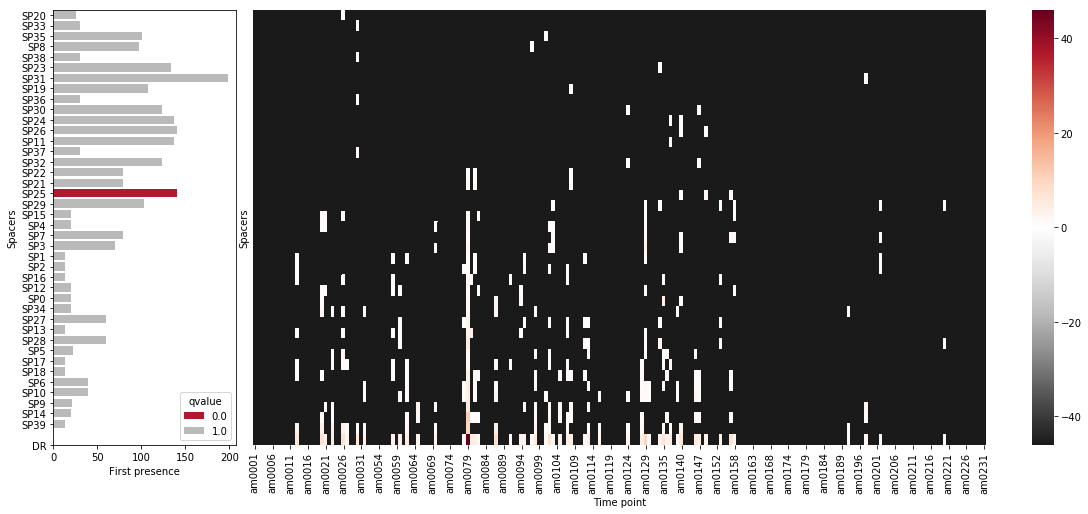

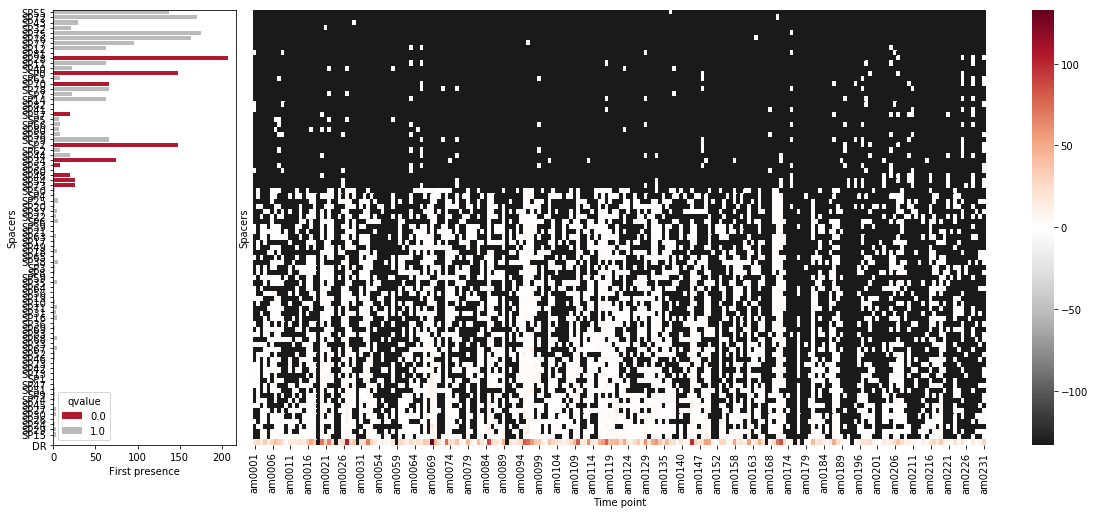

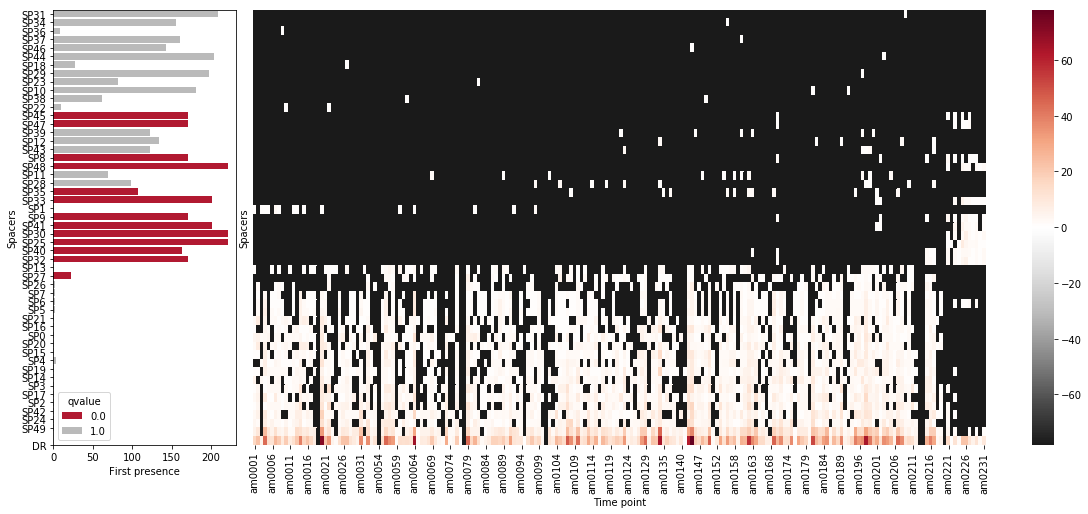

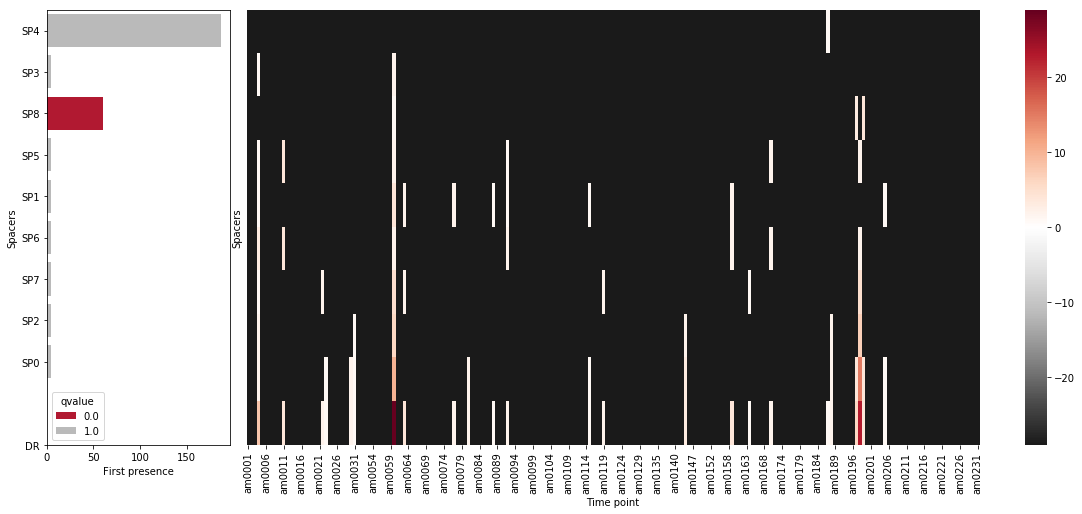

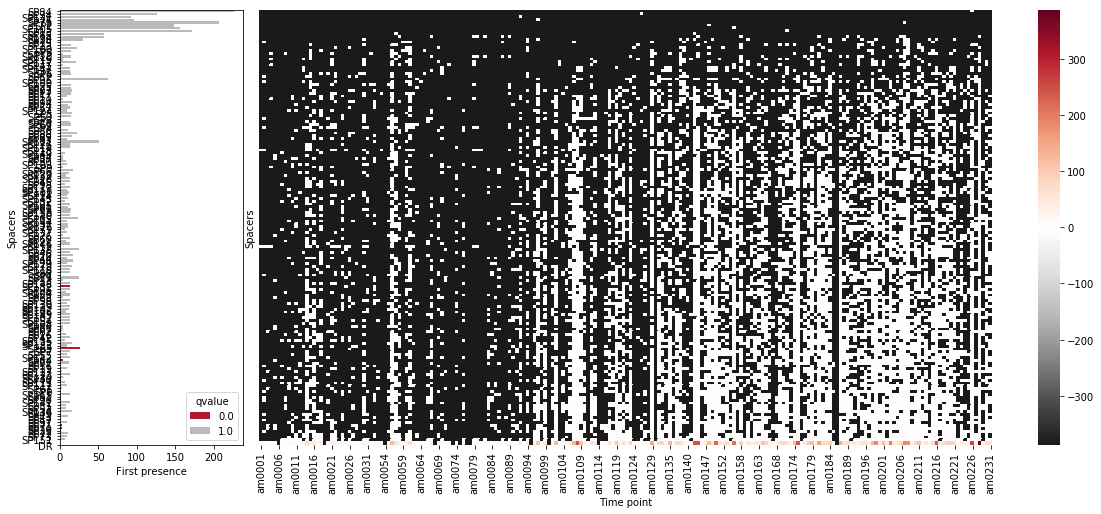

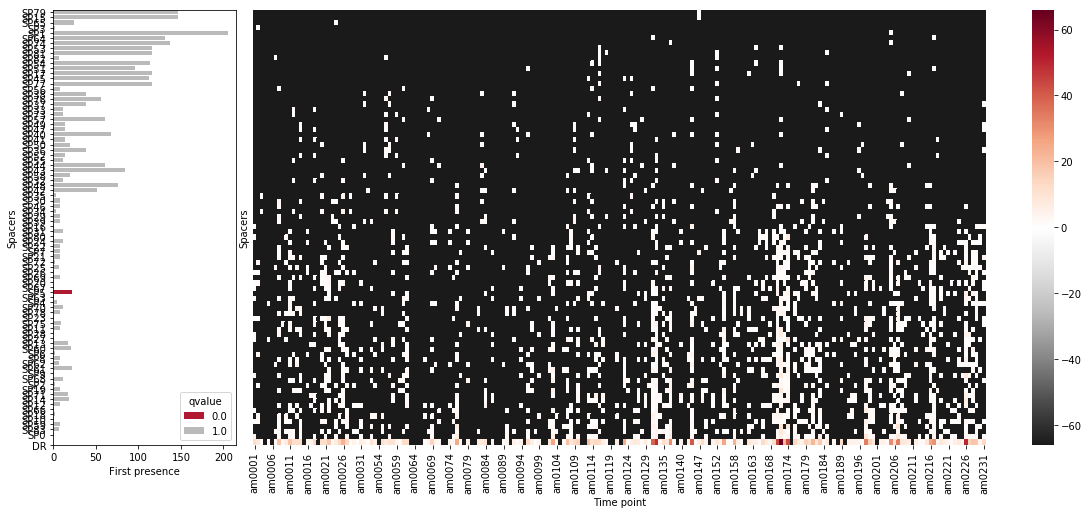

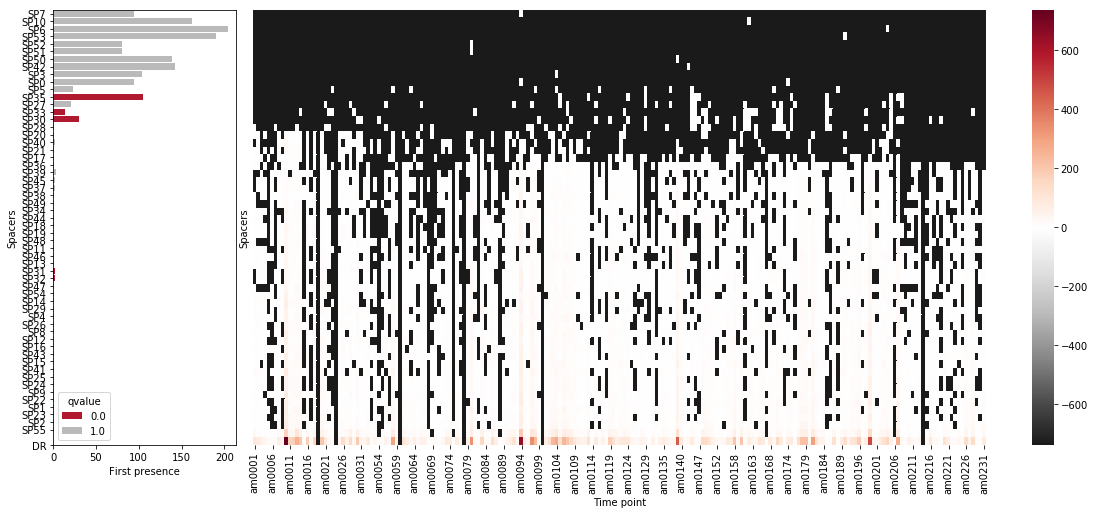

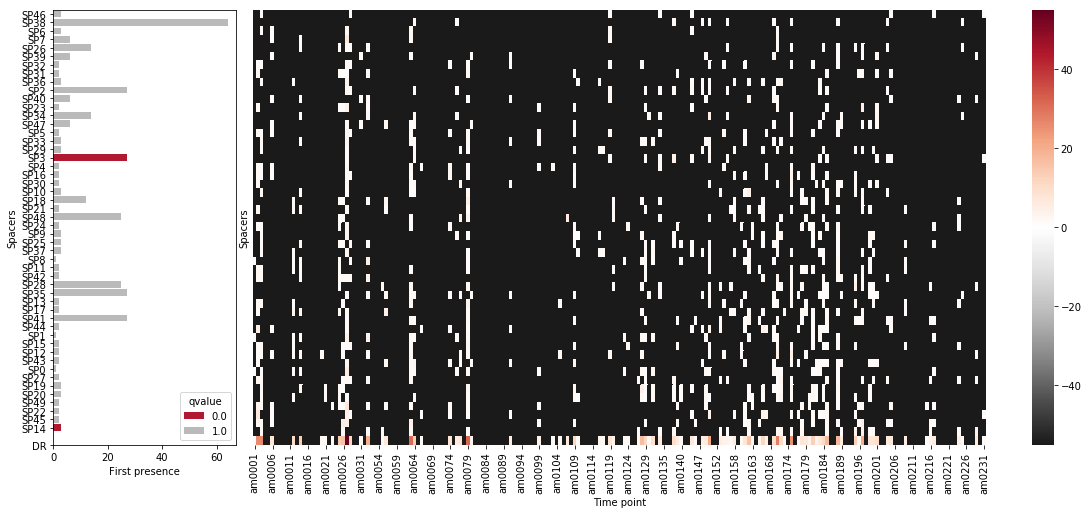

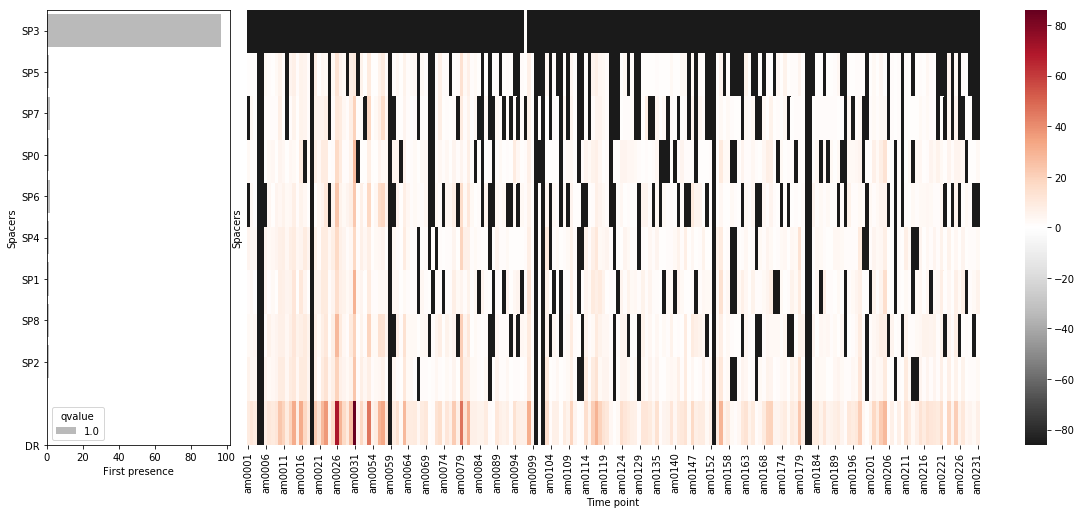

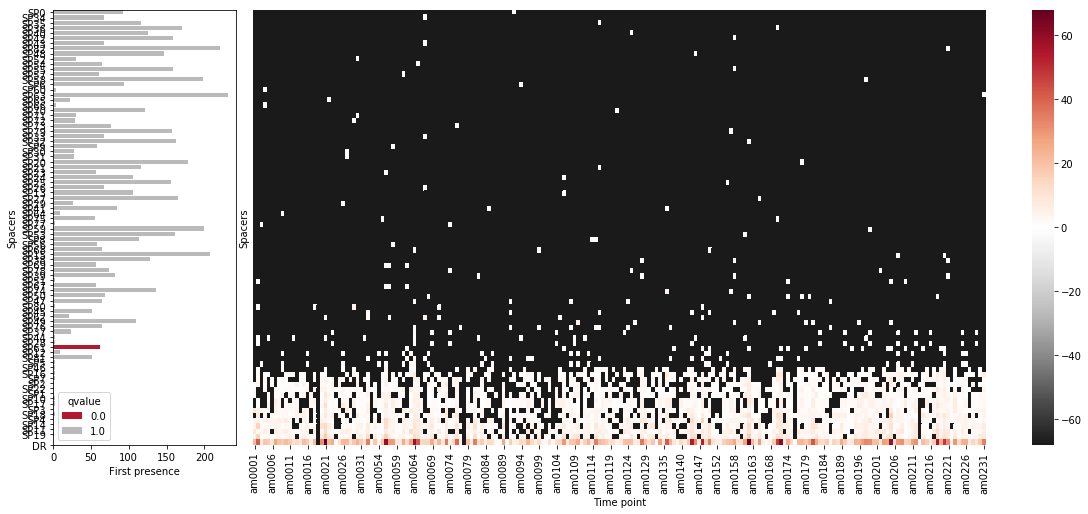

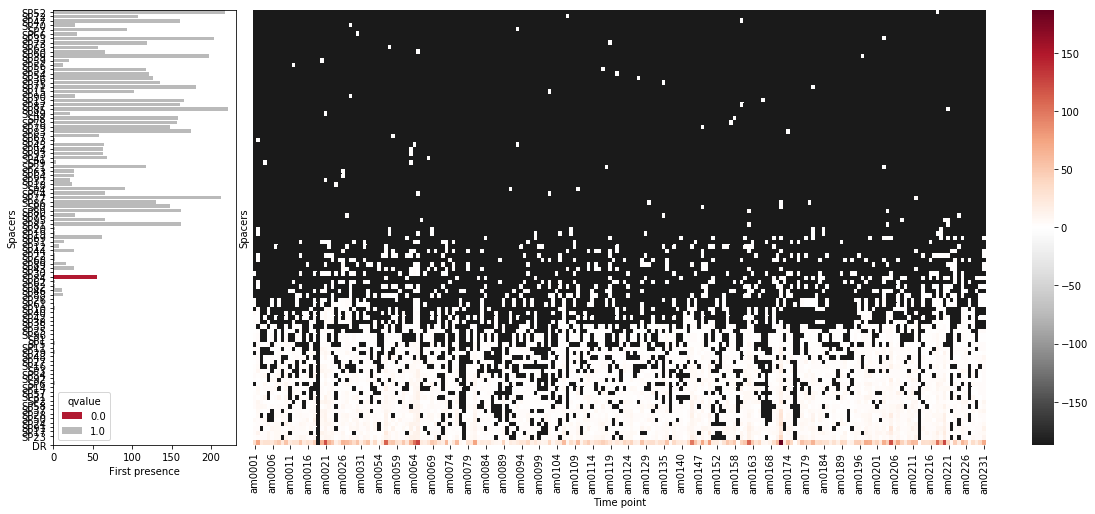

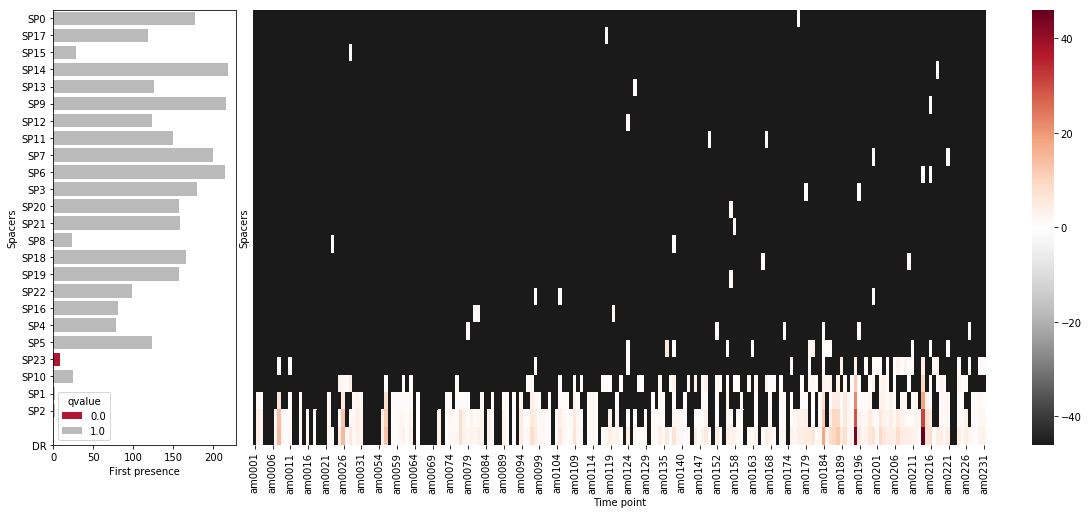

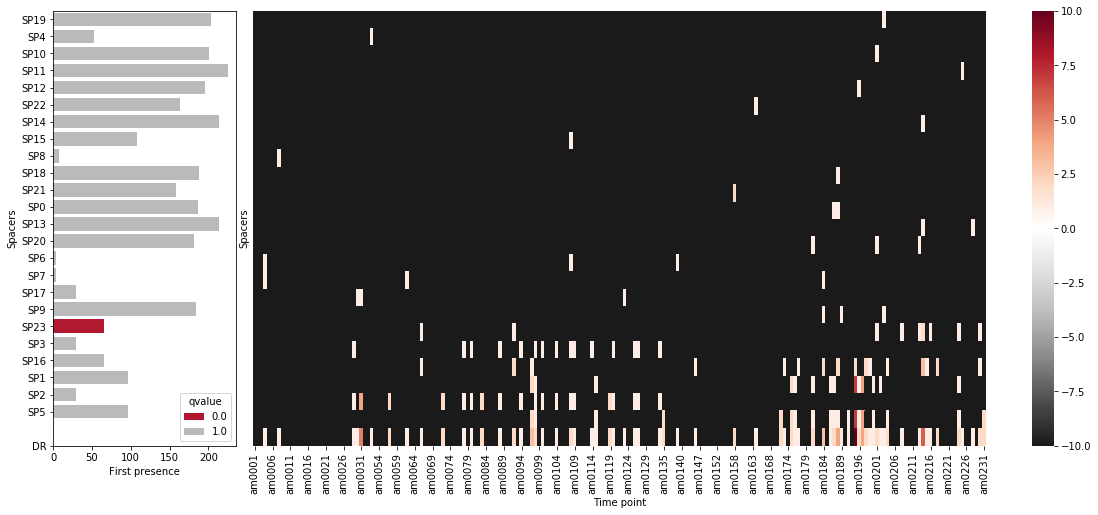

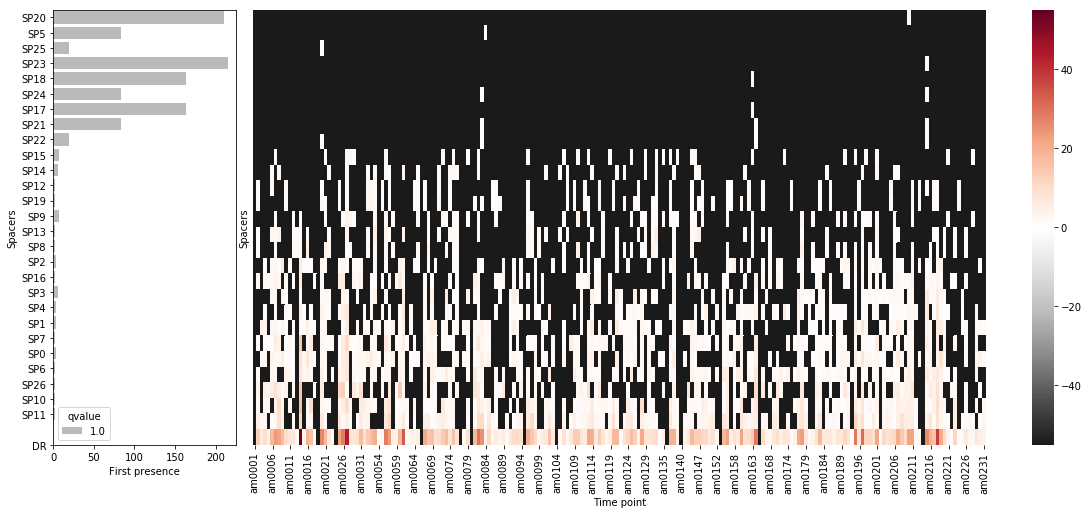

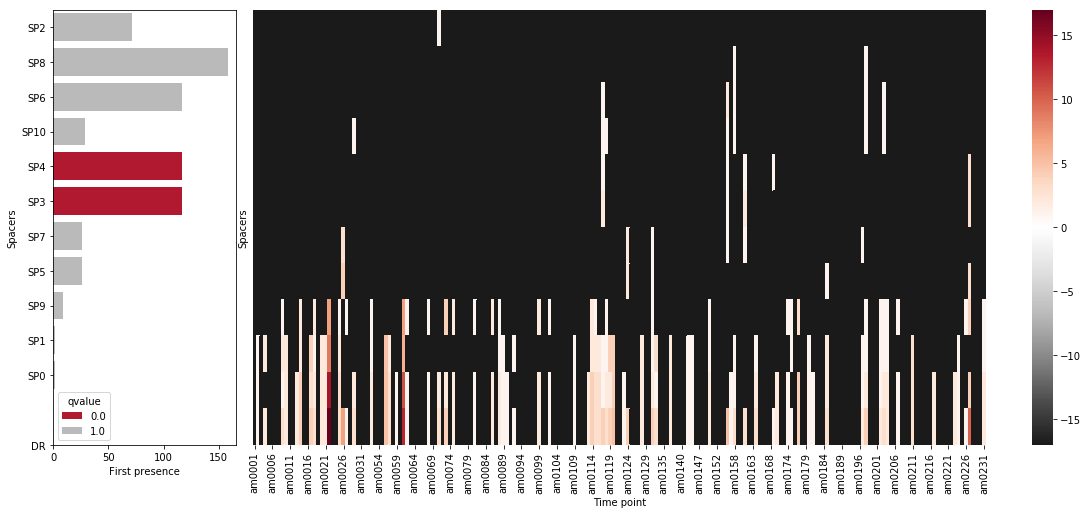

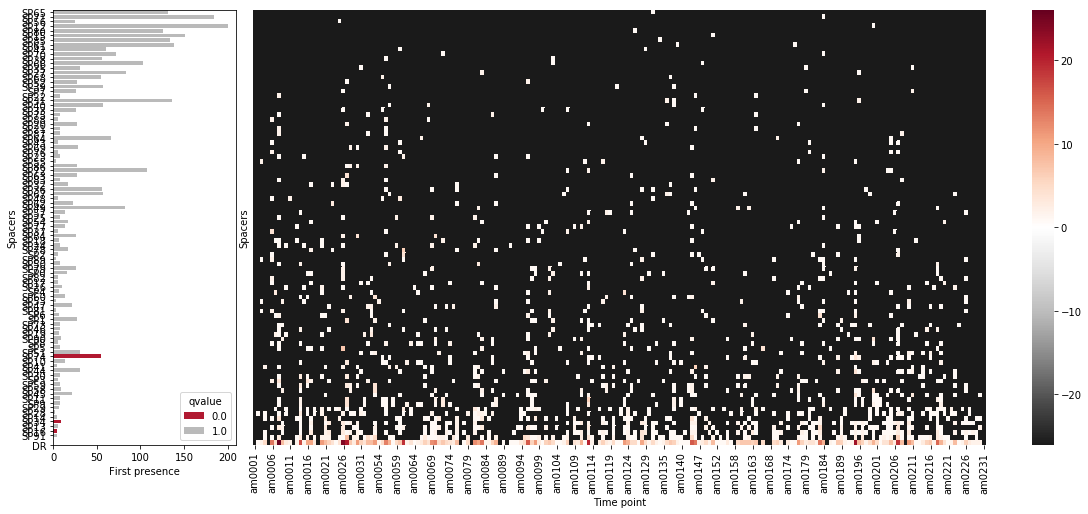

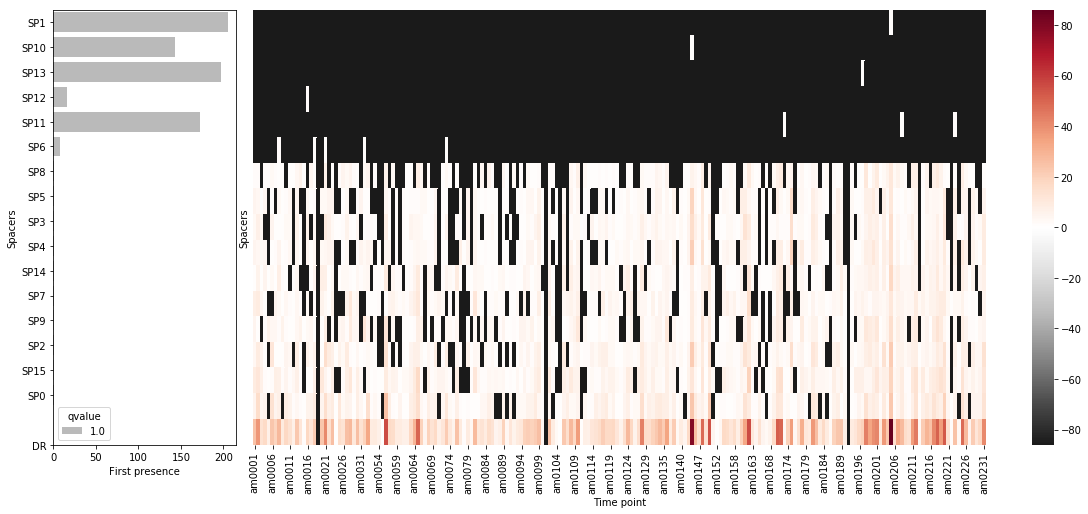

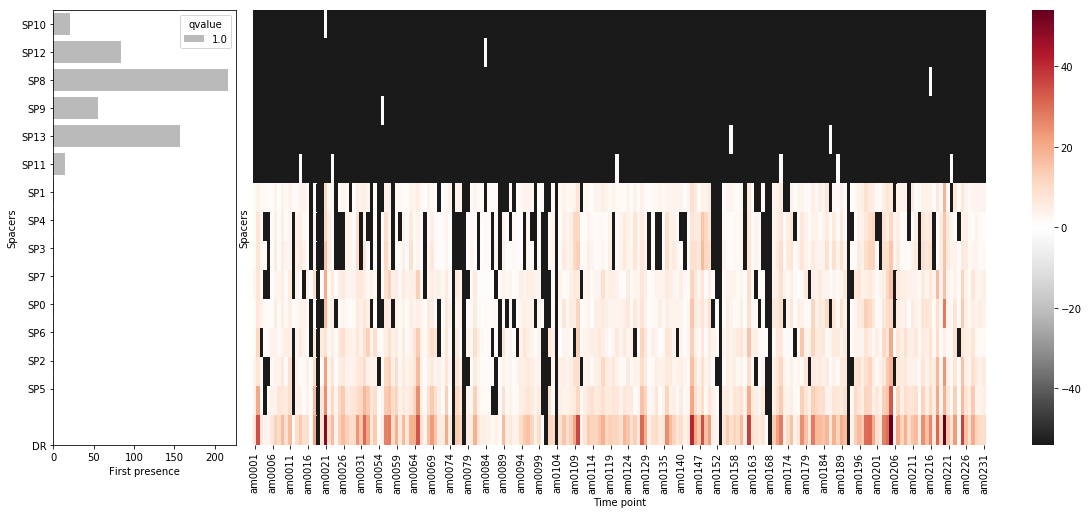

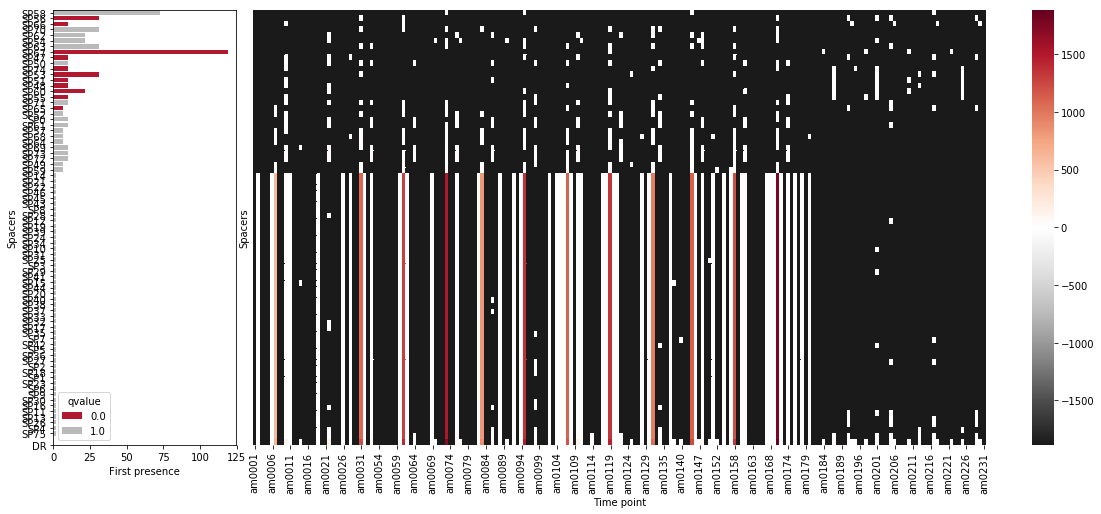

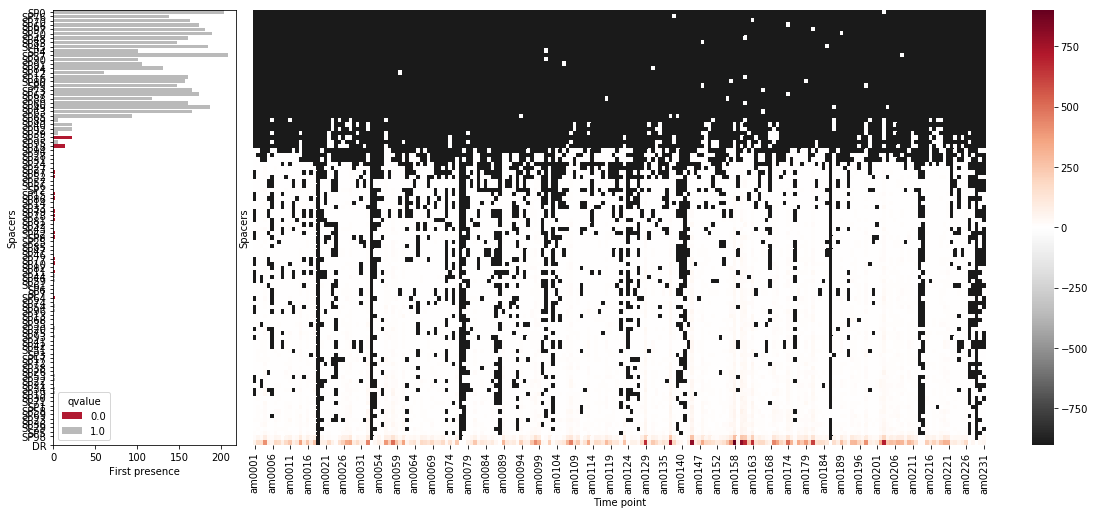

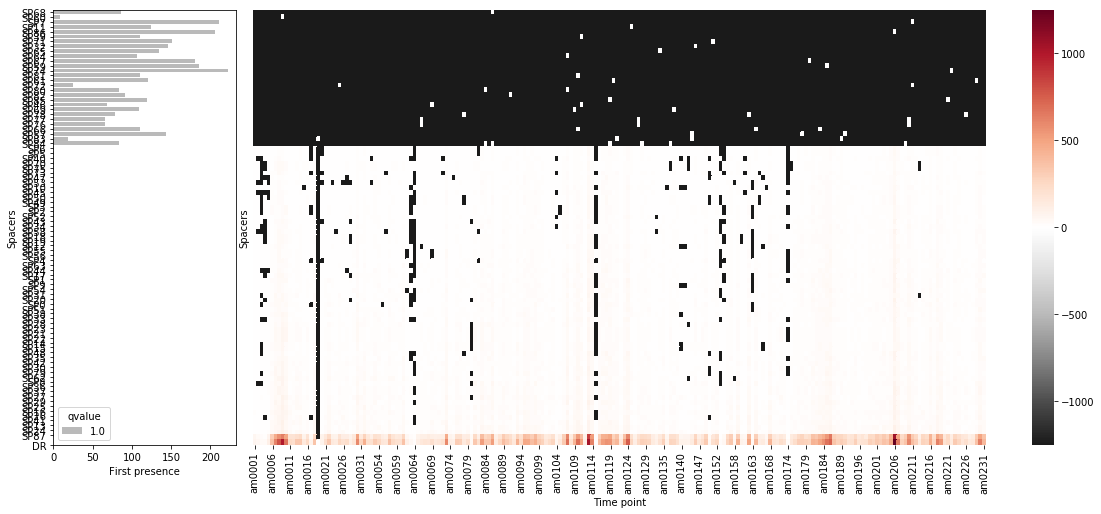

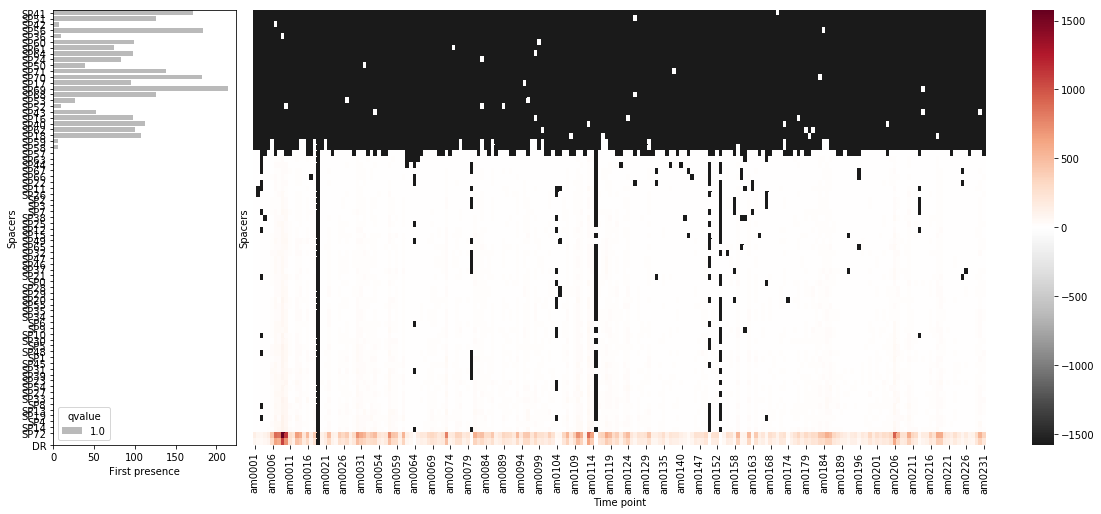

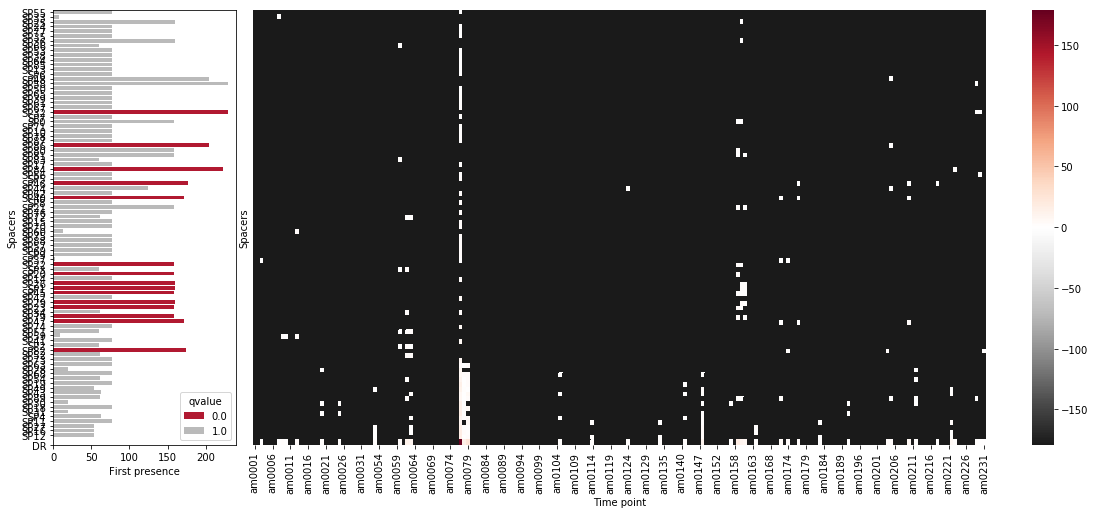

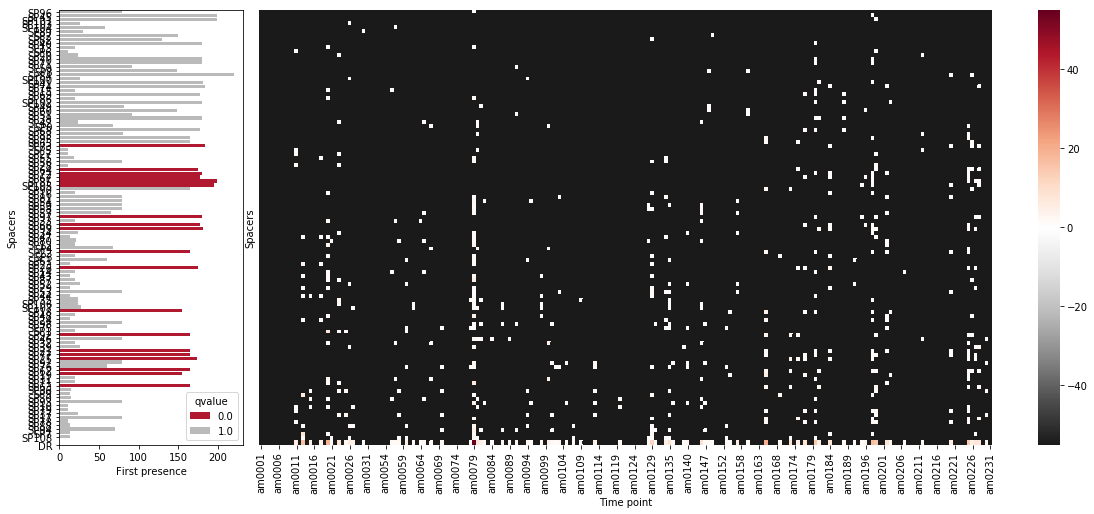

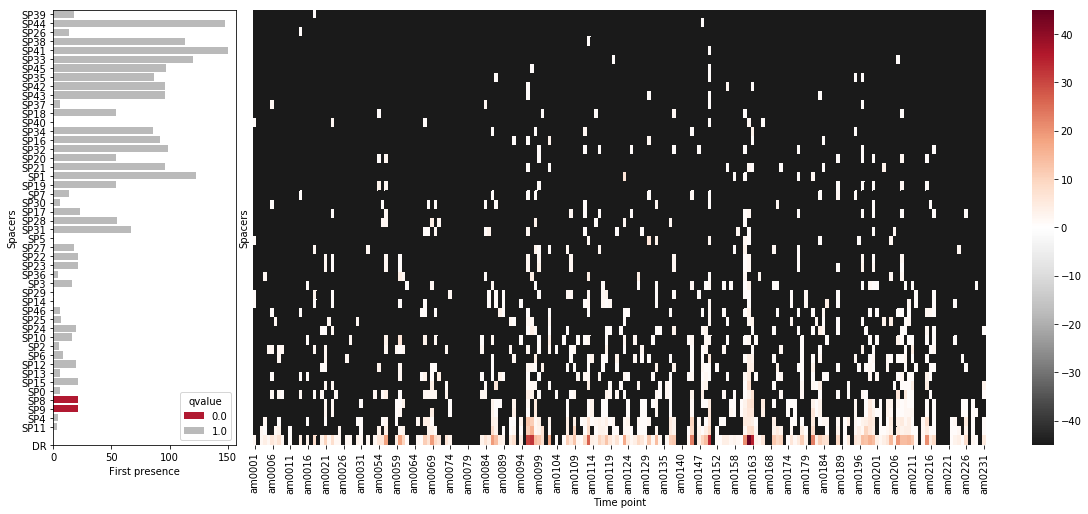

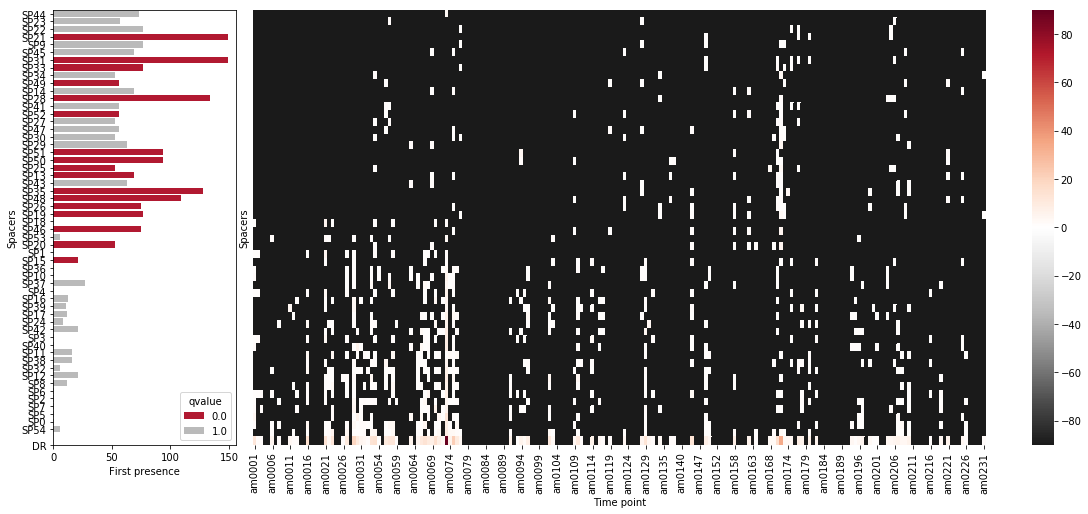

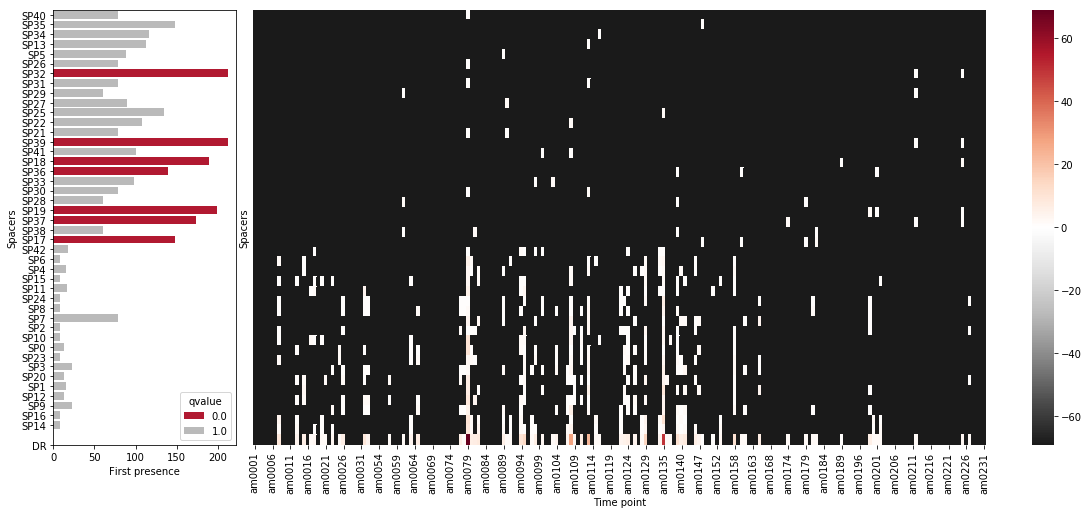

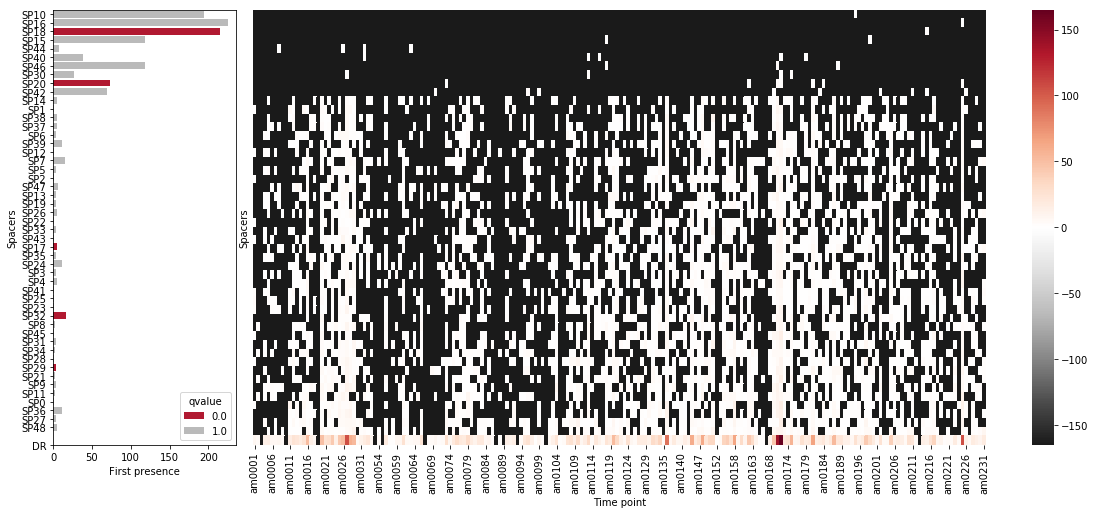

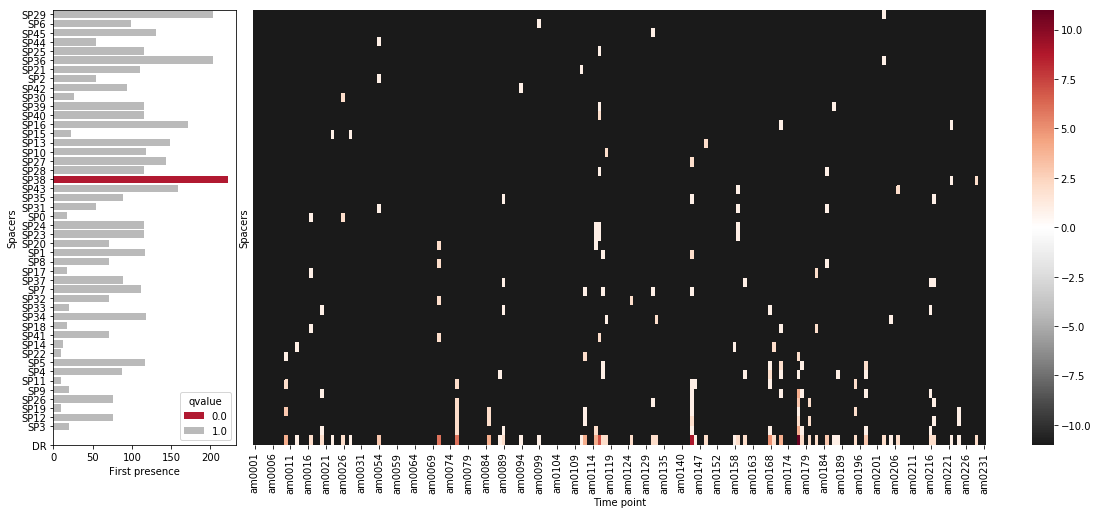

In [175]:
# spearman test
# use abundance weighted time distribution
import scipy.stats as stats
from datetime import datetime
import math
def time_sample(allsamples,dat_short,j):
    time1=[]
    for sample in range(0,allsamples):
        time1+=[sample]*math.ceil(dat_short.iloc[sample,j])
    SPmean = np.mean(time1) 
    return [time1,SPmean]

def time_DR(allsamples,DR_abu):
    time1=[]
    for sample in range(0,allsamples):
        time1+=[sample]*math.ceil(DR_abu[sample])
    DRmean = np.mean(time1)
    return [time1,DRmean]

Plot = True
DRnumall = len(DR_all)
DRnum = 0
for DR0 in DR_all:
    dat_short = dat[dat['DR']==DR0]
    dat_short2 = dat_short.iloc[:,1:]
    allsamples = dat_short2.shape[1]
    allSPnum = dat_short2.shape[0]
    # compute mean time
    dat_short2['sum']=list(dat_short2.sum(axis=1))
    dat_short2['mean']=0
    # find abundance for DR
    DR_abu = list(DRabu.loc[DR0.lower(),:])
    dat_short2['SP']=dat_short2.index
    dat_short2 = dat_short2.sort_values('sum')
    dat_short2['neworder']=range(0,allSPnum)
    dat_short = dat_short2.T
    dat_short.columns=dat_short.iloc[-1,]
    dat_short=dat_short.iloc[0:(dat_short.shape[0]-4),:]
    # compute KS test
    dat_short_corr = pd.DataFrame(
    {'Order':range(0,allSPnum),
    'SP':'','pvalue':0,'Weighted time diff':0
    })
    k = 0 
    timeDR,DRmean = time_DR(allsamples,DR_abu)
    for i in range(0,allSPnum):
            timeSP,SPmean=time_sample(allsamples,dat_short,i)
            dat_short2.iloc[i,-3] = SPmean
            pvalue = stats.ks_2samp(timeSP,timeDR,alternative = 'less')
            dat_short_corr.loc[k,'SP']=dat_short.columns[i]
            dat_short_corr.loc[k,'pvalue']=pvalue.pvalue
            dat_short_corr.loc[k,'Weighted time diff']=SPmean-DRmean
            k+=1
    dat_short_corr['qvalue']=fdrcorrection(list(dat_short_corr['pvalue']), 
                                               alpha=0.05, method='indep', is_sorted=False)[-1]
    dat_short_corr['qvalue'][abs(dat_short_corr['qvalue'])>=0.05]=1
    dat_short_corr['qvalue'][abs(dat_short_corr['qvalue'])<0.05]=0
    if dat_short_corr[dat_short_corr['qvalue']==0].shape[0] > 0:
        # compute time diff
        dat_short2['firstpresence']=0
        for i in reversed(range(0,allsamples)):
            dat_short2.loc[dat_short2.iloc[:,i]>0,'firstpresence']=int(dat_short2.columns[i].split('am')[1])
        dat_short_corr=dat_short_corr.merge(dat_short2.loc[:,['firstpresence','neworder']],left_on='SP',right_on='neworder',how='left')
        firstpresence_DR = min(dat_short_corr['firstpresence'])
        dat_short_corr['qvalue'][dat_short_corr['firstpresence']<=firstpresence_DR]=1
        dat_short.to_csv('data/MG/figure/data/%s.txt'%(DR0), sep='\t')
        if Plot:
            fig, axs = plt.subplots(ncols=2,figsize=(20, 8),gridspec_kw={'width_ratios': [1, 5]})
            plt.subplots_adjust(wspace=0.03)
            dat_short[allSPnum+1]=DR_abu
            dat_short=dat_short.astype('float')
            dat_short[dat_short==0]=-max(dat_short.max())
            dat_short = dat_short.T
            sns.heatmap(dat_short, xticklabels=5,cmap='RdGy_r',ax=axs[1],center = 0)
            sns.barplot(data=dat_short_corr, y='SP',x='firstpresence', 
                                hue="qvalue",palette={0:'#ca0020',1:'#bababa'},ax=axs[0],orient = 'h',dodge=False)
            axs[0].set_ylabel('Spacers')
            axs[0].set_xlabel('First presence')
            plt.sca(axs[0])
            plt.yticks(labels=list(dat_short2['SP'])+['DR'],ticks=dat_short.index)
            axs[1].get_yaxis().set_ticks([])
            axs[1].set_ylabel('Spacers')
            axs[1].set_xlabel('Time point')
            plt.savefig('data/MG/figure/new.%s.pdf'%(DR0), bbox_inches='tight')
        dat_short_corr=dat_short_corr.merge(dat_short2.loc[:,['neworder','SP']],left_on = 'neworder',right_on = 'neworder',how='left')
        dat_short_corr.loc[:,['pvalue','qvalue','Weighted time diff','firstpresence','neworder','SP_y']].to_csv('data/MG/figure/data/%s.cor.txt'%(DR0), sep='\t')
        #dat_short['SP'] = list(dat_short2['SP']) +['DR']
    DRnum+=1
    if DRnum%10 == 0:
        print(datetime.now(),'processed %s of %s DRs'%(DRnum,DRnumall))


In [2]:
## compute spacer acquisition rate
import glob,os
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame,date_range
from matplotlib import cm
import seaborn as sns
import scipy as sp
import math
import warnings
warnings.filterwarnings('ignore')

6 0.8186046511627907 1889.5995145631073 7.712651079849418 0.04558189573113648 0.3515572573323333
6 6582.0 5388.0 0.055682429444286044
8 1.0063936847936479 1528.8512207901178 7.280243908524371 0.06326414807672143 0.46057842866353504
8 4742.0 4772.0 0.06286222681305197
10 1.1938643844634629 1282.4634008400096 6.9699097871739655 0.08918100370944747 0.6215835505844757
10 3364.0 4016.0 0.07469944230686343
15 1.5861904274553953 954.7850293208229 6.723838234653682 0.09390753515253768 0.6314190753807176
15 3195.0 5067.0 0.059203191197658656
20 1.954543572759263 763.4861719580921 6.5255228372486505 0.1377803913958156 0.8990890905784522
20 2177.0 4256.0 0.07049236114051356


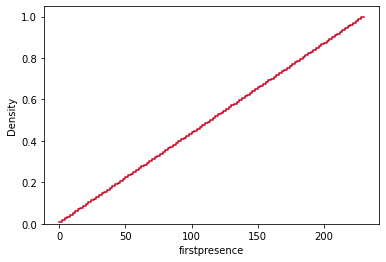

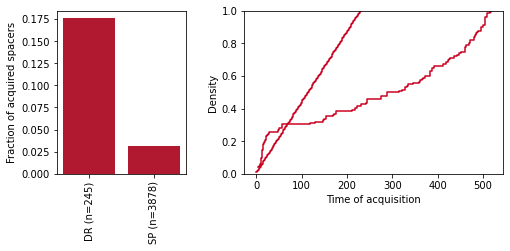

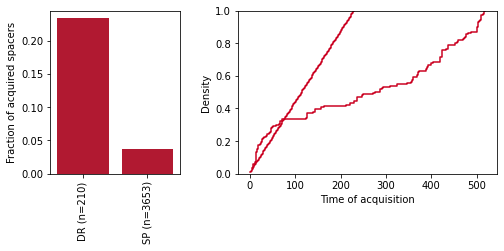

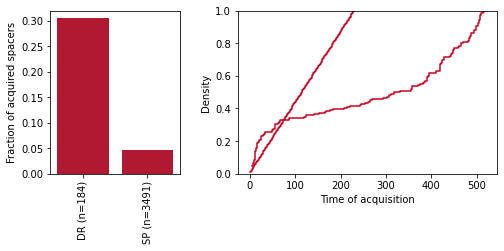

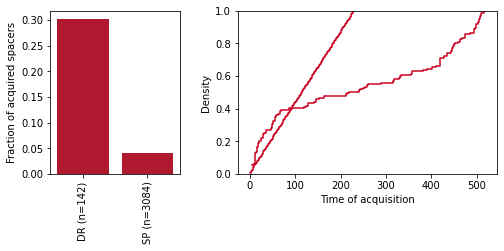

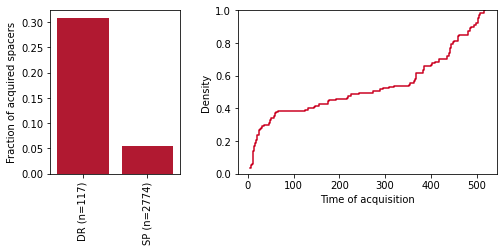

In [63]:
for reads in [6,8,10,15,20]:
    allcor = glob.glob('data/MG/figure/data/*%sreads.cor.txt'%(reads))
    datall=pd.read_csv("data/MG/spacer_abun_sample_rarefy_%sreads.csv"%(reads),sep='\t',index_col=0)
    datall=datall.loc[datall.iloc[:,1:].sum(axis=1)>0,:]
    DR_all = len(datall.DR.unique())
    SP_all = datall.shape[0]
    SP_acquired = 0
    DR_acquired = 0
    SP_acquired_info = pd.DataFrame({})
    # count average SP per species per sample
    SP_present = []
    for DR in datall['DR'].unique():
        datallsub = datall[datall['DR']==DR]
        for i in range(1,datallsub.shape[1]):
            SP_present.append(len([x for x in datallsub.iloc[:,i] if x > 0]))
    for corfile in allcor:
        dat=pd.read_csv(corfile,sep='\t',index_col=0)
        SP_present.append(dat.shape[0])
        DR = os.path.split(corfile)[-1].split('.cor')[0]
        # qvalue < 0.05 + later presence
        dat_acquired = dat[dat['qvalue']==0]
        if dat_acquired.shape[0]>0:
            # with acquired spacers (SP2)
            newspacers = dat_acquired.shape[0]
            DR_acquired += 1
            SP_acquired += newspacers
            SP_acquired_infosub = dat_acquired
            SP_acquired_infosub['DR']=DR
            SP_acquired_info = SP_acquired_info.append(SP_acquired_infosub)
    SP_acquired_info.index=(range(0,SP_acquired_info.shape[0]))
    # output
    SP_acquired_info.to_csv('data/MG/all.spacers.acquired.txt', sep='\t')
    f1=open('data/MG/all.spacers.acquiredsum.txt','w')
    f1.write('Factor\tAcquired\tTotal\n')
    f1.write('DR\t%s\t%s\n'%(DR_acquired,DR_all))
    f1.write('SP\t%s\t%s\n'%(SP_acquired,SP_all))
    f1.close()
    sum_acquired = pd.DataFrame(
            {'Factor':['DR (n=%s)'%(DR_all),'SP (n=%s)'%(SP_all)],
            'Percentage':[DR_acquired/DR_all,SP_acquired/SP_all]
            })

    time_all=517 # days
    SP_acquired_info['SP']=SP_acquired_info['DR']+'SP'+SP_acquired_info['neworder'].astype(str)
    SP_acquired_info=SP_acquired_info.drop_duplicates(subset=['SP'])
    SP_acquired_info['firstpresence']=SP_acquired_info['firstpresence']*time_all/SP_acquired_info['firstpresence'].max()

    null_model = pd.DataFrame(
        {'firstpresence':range(0,231)})
    sns.histplot(x='firstpresence', binwidth=2, data=null_model,color = '#ca0020',element="step", fill=False,
        cumulative=True,stat="density")
    fig, axs = plt.subplots(ncols=2,figsize=(8, 3),gridspec_kw={'width_ratios': [1, 2]})
    plt.subplots_adjust(wspace=0.3)
    sns.barplot(x='Factor', y='Percentage',ax=axs[0], data=sum_acquired,color = '#ca0020')
    sns.histplot(x='firstpresence', binwidth=2,ax=axs[1], data=SP_acquired_info,color = '#ca0020',element="step", fill=False,
        cumulative=True,stat="density")
    axs[0].set_xlabel('')  
    axs[0].set_ylabel('Fraction of acquired spacers') 
    plt.sca(axs[0])
    plt.xticks(rotation = 90)
    axs[1].set_xlabel('Time of acquisition')  
    axs[1].set_ylabel('Density') 
    plt.sca(axs[1])
    plt.ylim([0,1])
    plt.savefig('data/FigureMG_acquired.pdf', bbox_inches='tight')
    # load DR data
    DRabu=pd.read_csv('data/MG/dr_abun_sample.csv',sep=',',index_col=0)
    DRabu.index = [x.upper() for x in DRabu.index]
    DRabu = DRabu[DRabu.index.isin(datall.DR.unique())]
    mean_DR_abu = DRabu.mean(axis=1)
    total_cells_persample = sum(mean_DR_abu)/np.mean(SP_present)
    time_all=517 # days
    total_samples = datall.shape[1]-5
    spacer_acquisition_rate = SP_acquired/total_cells_persample/time_all*365# SP per cell per year
    spacer_acquisition_ratelineage = SP_acquired/DR_all/time_all*365# SP per lineage per year
    print(reads,np.mean(SP_present),total_cells_persample,total_cells_persample/DR_all,spacer_acquisition_rate,spacer_acquisition_ratelineage)
    print(reads,round(1/spacer_acquisition_rate*300), round(1/spacer_acquisition_rate*np.mean(SP_present)*300),spacer_acquisition_rate/np.mean(SP_present))



all 2.872808288653818 539.8965965120237 2.014539539223969 0.18176343936299102 0.36616963538208375
all 1650.0 4742.0 0.06327029898962187


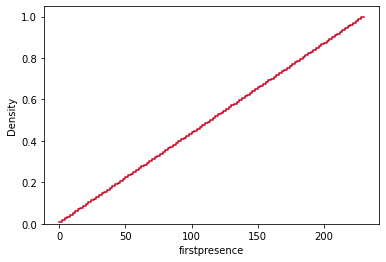

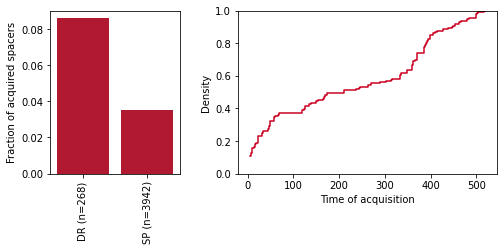

In [3]:
import glob,os
for reads in ['all']:
    allcor = glob.glob('data/MG/figure/data copy/*.cor.txt')
    datall=pd.read_csv("data/MG/spacer_abun_sample_sum.txt",sep='\t',index_col=0)
    DR_all = len(datall.DR.unique())
    SP_all = datall.shape[0]
    SP_acquired = 0
    DR_acquired = 0
    SP_acquired_info = pd.DataFrame({})
    # count average SP per species per sample
    SP_present = []
    for DR in datall['DR'].unique():
        datallsub = datall[datall['DR']==DR]
        for i in range(3,datallsub.shape[1]-2):
            SP_present.append(len([x for x in datallsub.iloc[:,i] if x > 0]))
    for corfile in allcor:
        dat=pd.read_csv(corfile,sep='\t',index_col=0)
        DR = os.path.split(corfile)[-1].split('.cor')[0]
        # qvalue < 0.05 + later presence
        dat_acquired = dat[dat['qvalue']==0]
        if dat_acquired.shape[0]>0:
            # with acquired spacers (SP2)
            newspacers = dat_acquired.shape[0]
            DR_acquired += 1
            SP_acquired += newspacers
            SP_acquired_infosub = dat_acquired
            SP_acquired_infosub['DR']=DR
            SP_acquired_info = SP_acquired_info.append(SP_acquired_infosub)
    SP_acquired_info.index=(range(0,SP_acquired_info.shape[0]))
    # output
    SP_acquired_info.to_csv('data/MG/all.spacers.acquired.txt', sep='\t')
    f1=open('data/MG/all.spacers.acquiredsum.txt','w')
    f1.write('Factor\tAcquired\tTotal\n')
    f1.write('DR\t%s\t%s\n'%(DR_acquired,DR_all))
    f1.write('SP\t%s\t%s\n'%(SP_acquired,SP_all))
    f1.close()
    sum_acquired = pd.DataFrame(
            {'Factor':['DR (n=%s)'%(DR_all),'SP (n=%s)'%(SP_all)],
            'Percentage':[DR_acquired/DR_all,SP_acquired/SP_all]
            })

    time_all=517 # days
    SP_acquired_info['SP']=SP_acquired_info['DR']+'SP'+SP_acquired_info['neworder'].astype(str)
    SP_acquired_info=SP_acquired_info.drop_duplicates(subset=['SP'])
    SP_acquired_info['firstpresence']=SP_acquired_info['firstpresence']*time_all/SP_acquired_info['firstpresence'].max()

    null_model = pd.DataFrame(
        {'firstpresence':range(0,231)})
    sns.histplot(x='firstpresence', binwidth=2, data=null_model,color = '#ca0020',element="step", fill=False,
        cumulative=True,stat="density")
    fig, axs = plt.subplots(ncols=2,figsize=(8, 3),gridspec_kw={'width_ratios': [1, 2]})
    plt.subplots_adjust(wspace=0.3)
    sns.barplot(x='Factor', y='Percentage',ax=axs[0], data=sum_acquired,color = '#ca0020')
    sns.histplot(x='firstpresence', binwidth=2,ax=axs[1], data=SP_acquired_info,color = '#ca0020',element="step", fill=False,
        cumulative=True,stat="density")
    axs[0].set_xlabel('')  
    axs[0].set_ylabel('Fraction of acquired spacers') 
    plt.sca(axs[0])
    plt.xticks(rotation = 90)
    axs[1].set_xlabel('Time of acquisition')  
    axs[1].set_ylabel('Density') 
    plt.sca(axs[1])
    plt.ylim([0,1])
    plt.savefig('data/FigureMG_acquired.pdf', bbox_inches='tight')
    # load DR data
    DRabu=pd.read_csv('data/MG/dr_abun_sample.csv',sep=',',index_col=0)
    mean_DR_abu = DRabu.mean(axis=1)
    total_cells_persample = sum(mean_DR_abu)/np.mean(SP_present)
    time_all=517 # days
    total_samples = datall.shape[1]-5
    spacer_acquisition_rate = SP_acquired/total_cells_persample/time_all*365# SP per cell per year
    spacer_acquisition_ratelineage = SP_acquired/DR_all/time_all*365# SP per lineage per year
    print(reads,np.mean(SP_present),total_cells_persample,total_cells_persample/DR_all,spacer_acquisition_rate,spacer_acquisition_ratelineage)
    print(reads,round(1/spacer_acquisition_rate*300), round(1/spacer_acquisition_rate*np.mean(SP_present)*300),spacer_acquisition_rate/np.mean(SP_present))




In [ ]:
###end